# Plotting with Pandas and Matplotlib

-----

### Learning Objectives
*After this lesson, you will be able to:*
- Implement different types of plots on a given dataset.

<!--
Talking points:
We will use Pandas and Matplotlib to create simple plots.
We'll cover plotting line plots, scatter plots, bar plots, and histograms, and a brief introduction on how to manipulate the style of your plots with Matplotlib.
-->

---------

## Recap

In the last lesson, we learned about when to use the different types of plots. Can anyone give an example of when we would use a:
 * line plot?
 * bar plot?
 * histogram?
 * scatter plot?

### Pandas and Matplotlib

<!--
Talking points:
In this lesson, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.
-->

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

*Sometimes Pandas can be a little frustrating... perserverence is key!*

![](https://media.giphy.com/media/EPcvhM28ER9XW/giphy.gif)

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

## Plotting with Pandas: How?

`<data_set>.<columns>.plot()`

`population.states.count().plot()` creates:

![](https://exceljet.net/sites/default/files/styles/original_with_watermark/public/images/charttypes/line%20chart2.png?itok=lG1hqRu4)

## Plotting: Visualization Types

Line charts are default.

`# line chart`

`population.states.count().plot()`

For other charts:

`population.states.plot(kind='bar')`

`population.states.plot(kind='hist', bins=3);`

`population.states.plot(kind='scatter', x='states', y='population')`

Let's try!

### Import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline
from IPython.display import HTML

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Load in data sets for visualization examples.

The Boston data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [4]:
# Read in the Boston housing data.
housing_csv = '../datasets/boston_housing_data.csv'
housing = pd.read_csv(housing_csv)

# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = '../datasets/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

# Read in the ufo data.
ufo = pd.read_csv('../datasets/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---


In [5]:
# first, we need to get the counts of how many sightings per year, sorted by year

ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
1936       2
1937       2
1939       3
1941       2
1942       3
1943       5
1944       8
1945       9
1946       8
1947      41
1948       9
1949      19
1950      31
1951      21
1952      52
1953      36
1954      55
1955      33
1956      46
1957      78
1958      53
1959      57
1960      67
1961      50
1962      72
        ... 
1985     211
1986     186
1987     210
1988     232
1989     247
1990     237
1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
2001    2925
2002    2933
2003    3507
2004    3850
2005    3787
2006    3445
2007    4058
2008    4655
2009    4251
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

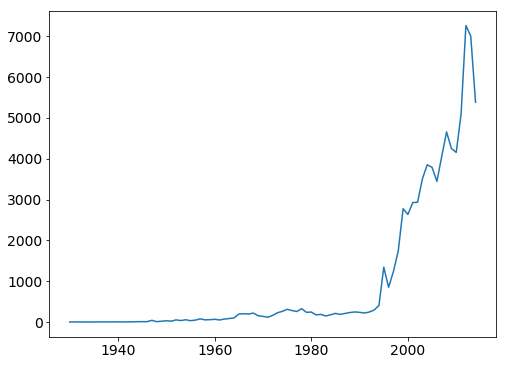

In [21]:
# Compare this list of numbers with a line plot of UFO sightings by year
ufo.Year.value_counts().sort_index().plot()

### Knowledge Check

Why does it make sense to use a line plot for this visualization?

---

### Another example

---

In [18]:
drinks.continent.sort_index().value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

### Knowledge Check

Why would it **NOT** make sense to use a line plot for this visualization?

---

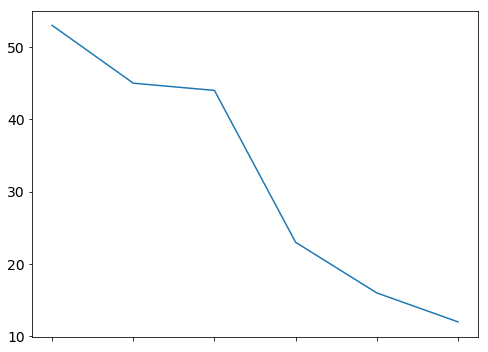

In [23]:
drinks.continent.sort_index().value_counts().plot()

<!--
Talking points:
**Important:** A line plot is the wrong type of plot for this data. Any set of countries can be rearranged misleadingly to illustrate a negative trend, as we did here. Due to this, it would be more appropriate to represent this data using a bar plot, which does not imply a trend based on order.
-->

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

### You try :

#### Count the number of countries in each continent in the drinks dataset.


In [25]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

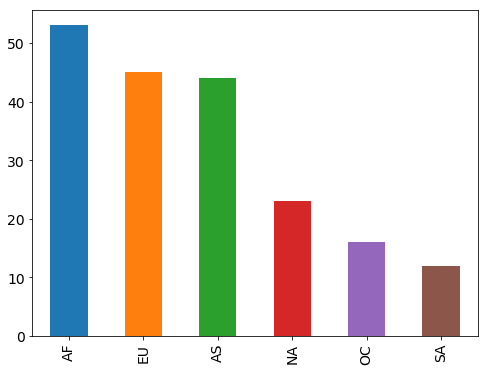

In [26]:
# Compare with a bar plot.
drinks.continent.value_counts().plot(kind='bar')

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


### How would you split the following values into 3 equally sized bins?

In [27]:
drinks.beer.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

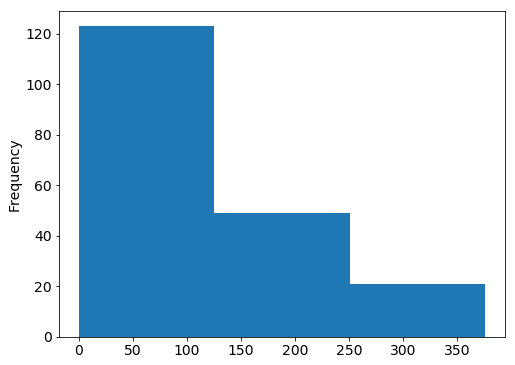

In [28]:
# Compare the above with a histogram.
# About how many of the points above are in the groups 1-125, 125-250, and 250-376?
drinks.beer.plot(kind='hist', bins=3);

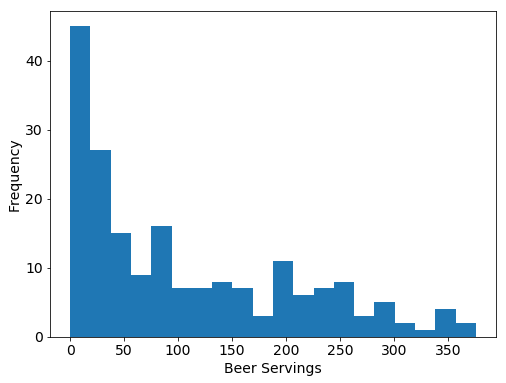

In [29]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.
drinks.beer.plot(kind='hist', bins=20)
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')

### Knowledge check: what does the y-axis represent on a histogram? What about the x-axis? How would you explain a histogram to a non-technical person?

### Making histograms of an entire dataframe:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109941278>,
      dtype=object)

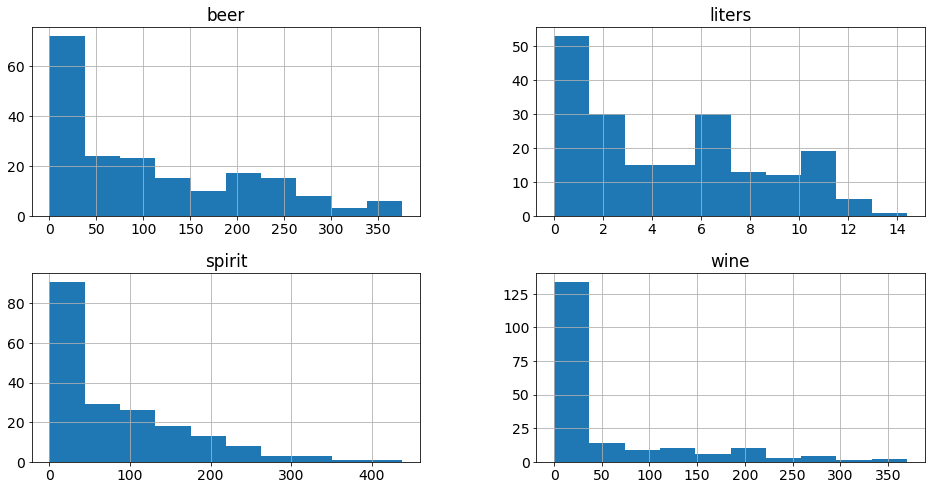

In [31]:
drinks.hist(figsize=(16,8))

### Why doesn't it make plots of ALL the columns in the dataframe?

Hint: what is different about the columns it plots vs. the ones it left out?

In [33]:
# Let's take a look at the dataframe:

drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


We see that it left out the country and continent columns, which are categorical (rather than numerical) variables. Think about it: how would you create bins for a categorical? (you wouldn't)

### Challenge: create a histogram of the wine column, with 10 bins, and label both axes

---

Text(0,0.5,'Frequency')

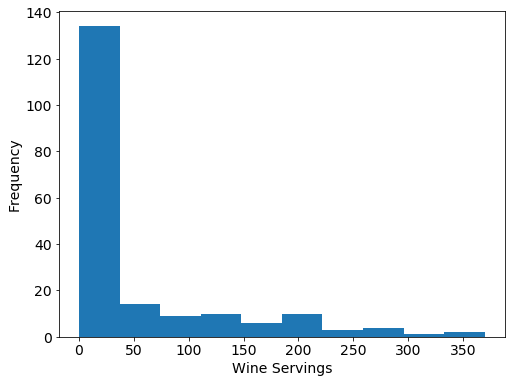

In [38]:
# solution
drinks.wine.plot(kind='hist', bins=10);
plt.xlabel('Wine Servings');
plt.ylabel('Frequency')

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


### Try it yourself: Select the beer and wine columns and sort by beer.

In [43]:
drinks[['beer', 'wine']].sort_values('beer')

,beer,wine
0,0,0
40,0,74
79,0,0
90,0,0
97,0,0
103,0,0
106,0,0
111,0,0
128,0,0
147,0,0


### Bonus: check out the difference between the above (dataframe) and the below (array), when we add '.values':

In [44]:
drinks[['beer', 'wine']].sort_values('beer').values

array([[  0,   0],
       [  0,  74],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  1,   7],
       [  1,   1],
       [  1,   4],
       [  1,   1],
       [  2,   0],
       [  3,   1],
       [  5,   0],
       [  5,   0],
       [  5,  16],
       [  5,   1],
       [  5,   0],
       [  6,   1],
       [  6,   0],
       [  6,   1],
       [  6,   9],
       [  8,   0],
       [  8,   1],
       [  8,   1],
       [  9,   2],
       [  9,   0],
       [  9,   7],
       [  9,   0],
       [ 12,  10],
       [ 13,   0],
       [ 15,   3],
       [ 15,   1],
       [ 16,   5],
       [ 16,   0],
       [ 17,   1],
       [ 18,   0],
       [ 19,  32],
       [ 19,   2],
       [ 20,   0],
       [ 20,  31],
       [ 21,  11],
       [ 21,  11],
       [ 21,   5],
       [ 21,

### Compare the two variables with a scatter plot

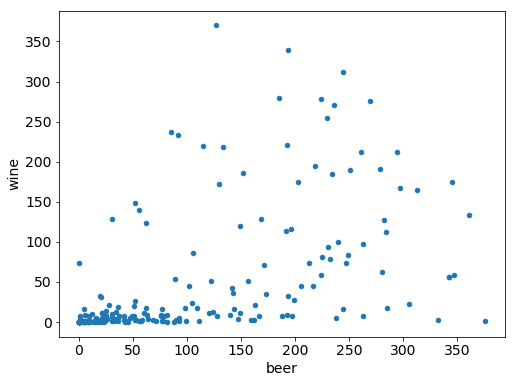

In [45]:
drinks.plot(kind='scatter', x='beer', y='wine')

### Discussion: How is the scatter plot different from the other plot types? What information does it tell us?

Scatter plots show us the **correlation** between variables. If we were to plot a variable against itself, we would see a perfect correlation:

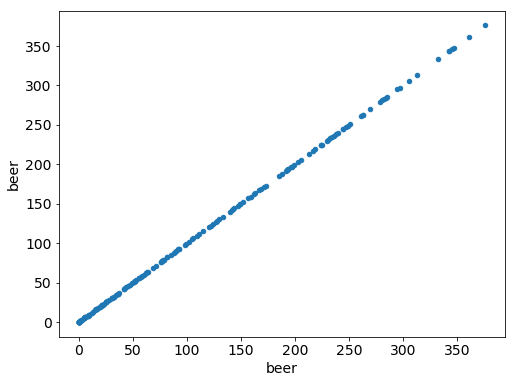

In [51]:
drinks.plot(kind='scatter', x='beer', y='beer')

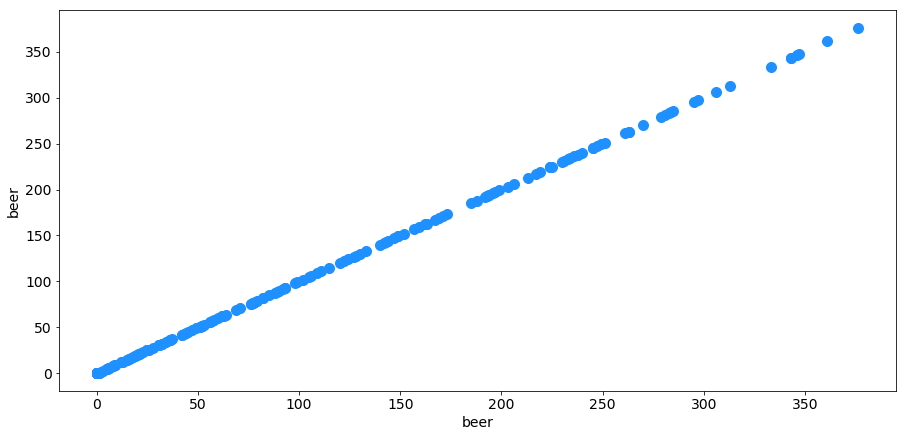

In [54]:
# let's add a few more parameters 
drinks.plot(kind='scatter', x='beer', y='beer', color='dodgerblue', figsize=(15,7), s=100)

#### Let's get fancy...

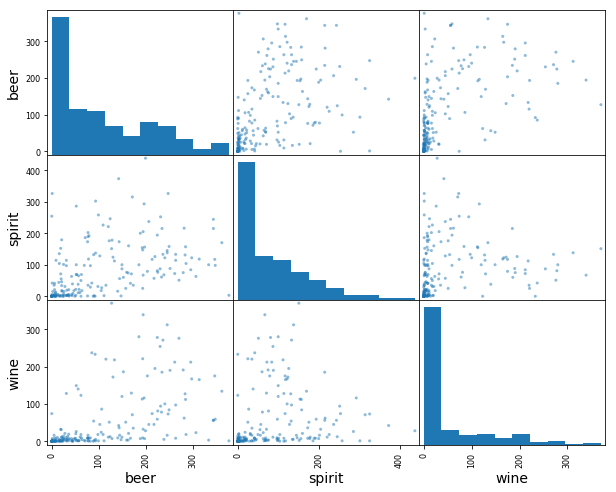

In [55]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8));

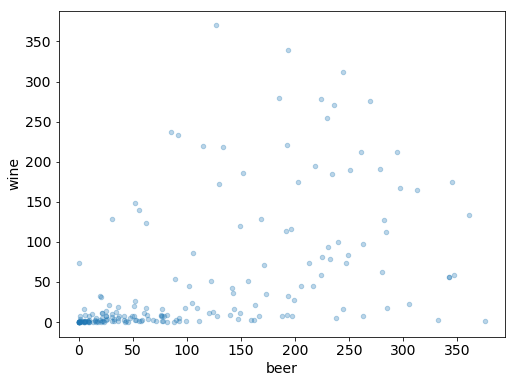

In [56]:
# Add transparency (great for plotting several graphs on top of each other, or for illustrating density!).
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3)

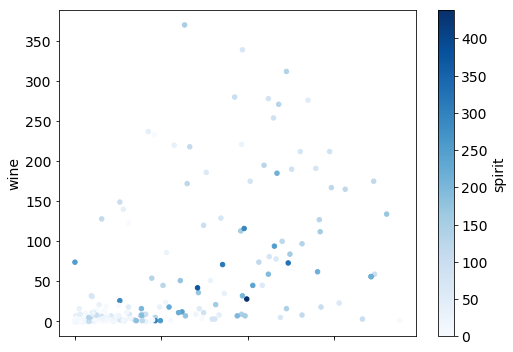

In [57]:
# Vary point color by spirit servings.
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues')

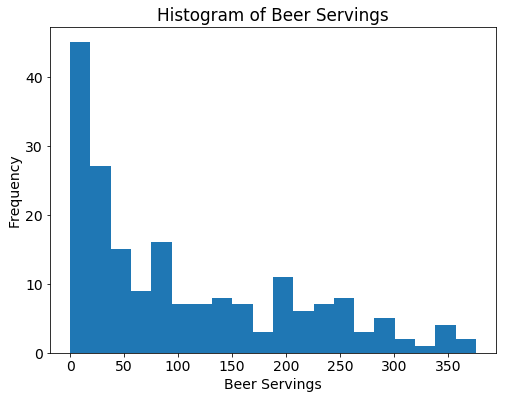

In [58]:
# Saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png')

<a id="summary"></a>
### Summary

In this lesson, we showed examples of how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Scatter plots

### Additional Resources

Always read the documentation!

- [Pandas Plotting Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

- [Matplotlib Documentation](https://matplotlib.org/)

- [Matplotlib sample plots](https://matplotlib.org/tutorials/introductory/sample_plots.html)